In [37]:
import numpy as np
from numpy import linalg as lin
import random as rn
from pyvis.network import Network
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
import triad_utils as tu

In [39]:
# UNIX
! rm net_names.txt
#v1) ! ls database >> net_names.txt
! ls matrices >> net_names.txt

In [40]:
file = open('net_names.txt')
net_names = [name.rstrip() for name in file]

In [41]:
len(net_names)

71

In [42]:
census = []
for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    for i in range(n):
        matrix[i,i] = 0 # removal of self-loops
    t = tu.triad_census(matrix)
    census.append(list(t))
    
df1 = pd.DataFrame(census)
df1.columns = ['t'+str(i) for i in range(1,14)]
df1.to_csv('triads_count.csv')

In [43]:
df1.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,33,31,87,10,18,0,8,1,0,1,2,0,1
1,47,34,53,18,20,3,51,4,1,6,12,5,0
2,123,85,180,22,26,2,38,3,3,0,7,0,0
3,9,12,25,13,6,2,1,0,2,2,1,3,1
4,36,44,68,12,8,0,2,1,0,0,0,0,0


In [66]:
df1 = pd.read_csv('triads_count.csv').drop('Unnamed: 0', axis=1)

In [60]:
norm_df1 = df1.div(df1.sum(axis=1), axis=0) 

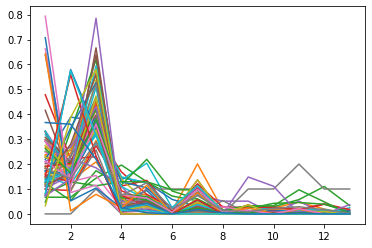

In [61]:
for i in range(len(norm_df1)):
    pr = norm_df1.loc[i]
    t = np.arange(1,14)
    plt.plot(t,pr)

In [62]:
data = [ list(norm_df1['t'+str(i+1)]) for i in range(13) ]

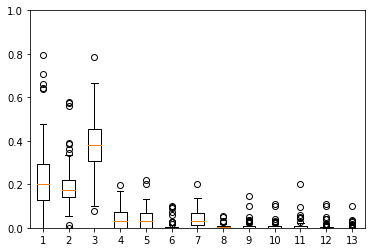

In [63]:
plt.boxplot(data,notch=False)
plt.ylim(0,1);

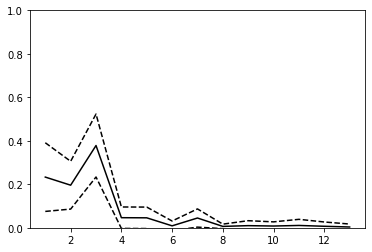

In [48]:
m = norm_df1.mean()
s = norm_df1.std()

plt.plot(t,m,'k')
plt.plot(t,m+s,'k--')
plt.plot(t,m-s,'k--')
plt.ylim(0,1);

In [49]:
df1.mean(axis=1,numeric_only=True)

0     14.769231
1     19.538462
2     37.615385
3      5.923077
4     13.153846
        ...    
66    10.923077
67    74.538462
68     2.384615
69     5.615385
70    34.384615
Length: 71, dtype: float64

# Random

In [14]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-12-24 17:09:03


In [15]:
ensemble_size = 10000

significance = []

for net_num in range(len(net_names)):
    matrix = np.loadtxt('matrices/'+net_names[net_num], dtype=int)
    n = len(matrix)
    n_edges = len(tu.edge_list(matrix))
    
    for i in range(n):
        matrix[i,i] = 0 # removal of self-loops
    t = tu.triad_significance_profile(matrix, ensemble_size, 100*n_edges)
    significance.append(list(t))
    
    print(net_num)
    
df2 = pd.DataFrame(significance)
df2.columns = ['t'+str(i) for i in range(1,14)]
df2.to_csv('significance_profiles.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [16]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-12-27 17:49:26


In [17]:
#df_result = pd.DataFrame(result)
df2

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,-3.291139,-2.624497,-2.523051,0.879652,1.849340,-0.446757,1.681651,-0.908068,-0.379653,1.781921,2.391507,-0.156258,44.710178
1,1.456825,0.297183,1.174422,0.323754,-0.753540,-0.219138,0.875534,-0.300177,-1.818854,-1.541597,1.002224,0.286697,-0.512051
2,-4.780612,-4.776301,-3.821010,0.949082,1.389862,2.332616,5.332339,-0.610172,3.217784,-0.594635,6.401462,-0.213101,-0.020004
3,-1.382020,-2.618984,-1.662184,0.544062,-1.071771,0.389176,-1.195686,-1.184192,2.489929,1.493419,-0.384410,3.753053,6.219529
4,1.368090,0.781096,0.462384,0.805851,0.736280,-0.502662,-1.999558,-0.673362,-0.700346,-0.537492,-0.816764,-0.250938,-0.037443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-3.376835,-3.947635,-2.726168,1.093484,0.792688,1.526773,2.839528,-0.792386,3.200551,-0.444187,3.739793,-0.166690,-0.017323
67,-1.005708,-0.260224,-0.578049,-0.142927,0.454016,0.629113,-0.781585,-1.194026,-1.021277,0.540245,0.468551,1.095803,1.918372
68,0.719981,0.812074,1.132783,-0.738265,-0.493585,-0.082744,-0.361715,-0.595625,-0.074367,0.000000,-0.133460,0.000000,0.000000
69,0.732392,0.779355,0.295403,-0.322899,0.459121,-0.120546,-1.195567,-0.412318,-0.168624,-0.132682,-0.207995,-0.044766,0.000000


In [18]:
df2.to_csv('New_run10000.csv')  

In [67]:
df2 = pd.read_csv('New_run10000.csv').drop('Unnamed: 0', axis=1)

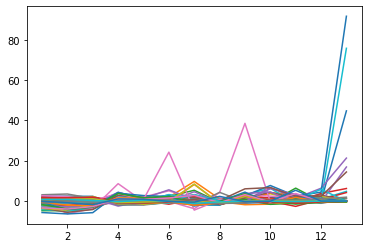

In [68]:
for i in range(len(df2)):
    pr = np.array(df2.loc[i])
    t = np.arange(1,14)
    plt.plot(t,pr)
#    plt.ylim(-1,1)

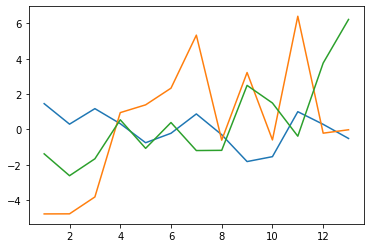

In [69]:
t = np.arange(1,14)
z1 = np.array(df2.loc[1])
z2 = np.array(df2.loc[2])
z3 = np.array(df2.loc[3])
plt.plot(t,z1)
plt.plot(t,z2)
plt.plot(t,z3)

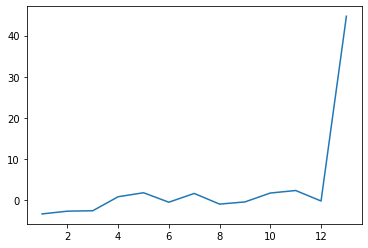

In [70]:
t = np.arange(1,14)
z0 = np.array(df2.loc[0])
plt.plot(t,z0)

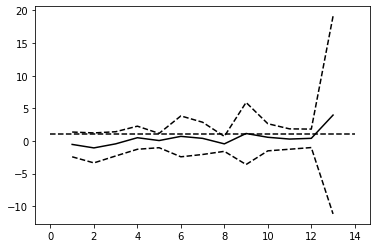

In [71]:
m = df2.mean()
s = df2.std()

plt.plot(t,m,'k')
plt.plot(t,m+s,'k--')
plt.plot(t,m-s,'k--')

plt.plot([0,14],[1,1],'--k')

# PCA of the direct census

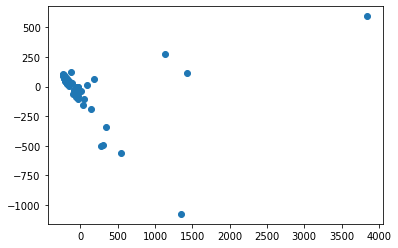

In [23]:
data0 = np.array(df1)
X_centered = df1 - df1.mean(axis = 0)
U, s , Vt = np.linalg.svd(X_centered)

W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
PCA1 = X2D[0]
PCA2 = X2D[1]

plt.scatter(PCA1,PCA2);

# PCA of the normalized census

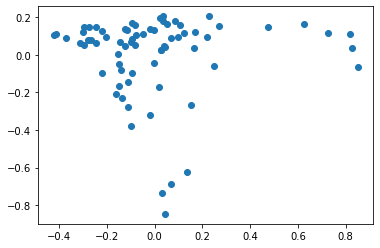

In [24]:
df1_norm = df1.div(
    np.linalg.norm(df1,axis=1),
    axis=0)

data1 = np.array(df1_norm)
X_centered = df1_norm - df1_norm.mean(axis = 0)
U, s , Vt = np.linalg.svd(X_centered)

W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
PCA1 = X2D[0]
PCA2 = X2D[1]

plt.scatter(PCA1,PCA2);

# PCA of the Significance Profiles

In [25]:
# Normalization: Z -> SP
df2_norm = df2.div(
    np.linalg.norm(df2,axis=1),
    axis=0)

In [26]:
df2_norm

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,-0.072864,-0.058105,-0.055859,0.019475,0.040943,-0.009891,0.037231,-0.020104,-0.008405,0.039451,0.052946,-0.003459,0.989853
1,0.417073,0.085080,0.336224,0.092687,-0.215730,-0.062737,0.250656,-0.085937,-0.520718,-0.441343,0.286926,0.082078,-0.146595
2,-0.391539,-0.391186,-0.312946,0.077731,0.113832,0.191044,0.436726,-0.049974,0.263541,-0.048701,0.524289,-0.017453,-0.001638
3,-0.157184,-0.297870,-0.189048,0.061879,-0.121898,0.044263,-0.135991,-0.134684,0.283192,0.169854,-0.043721,0.426853,0.707378
4,0.430433,0.245751,0.145477,0.253540,0.231651,-0.158149,-0.629107,-0.211855,-0.220345,-0.169107,-0.256973,-0.078951,-0.011780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.398741,-0.466142,-0.321909,0.129120,0.093602,0.180283,0.335295,-0.093566,0.377925,-0.052450,0.441599,-0.019683,-0.002046
67,-0.310256,-0.080278,-0.178326,-0.044092,0.140062,0.194079,-0.241115,-0.368352,-0.315059,0.166663,0.144546,0.338050,0.591809
68,0.371031,0.418490,0.583762,-0.380453,-0.254361,-0.042641,-0.186404,-0.306946,-0.038324,0.000000,-0.068777,0.000000,0.000000
69,0.406175,0.432220,0.163826,-0.179075,0.254622,-0.066853,-0.663045,-0.228666,-0.093517,-0.073584,-0.115351,-0.024827,0.000000


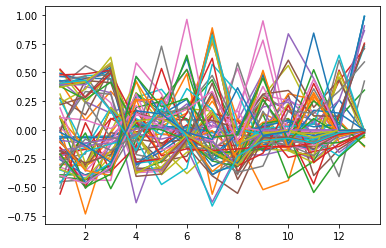

In [27]:
for i in range(len(df2_norm)):
    sp = np.array(df2_norm.loc[i])
    t = np.arange(1,14)
    plt.plot(t,sp)
#    plt.ylim(-1,1)

In [28]:
# Cleanup


data_new1 = df2_norm.copy()                                    # Create duplicate of data
data_new1.replace([np.inf, - np.inf], np.nan, inplace = True)  # Exchange inf by NaN
data_new1

data_new2 = data_new1.dropna()                                 # Delete rows with NaN
data_new2

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,-0.072864,-0.058105,-0.055859,0.019475,0.040943,-0.009891,0.037231,-0.020104,-0.008405,0.039451,0.052946,-0.003459,0.989853
1,0.417073,0.085080,0.336224,0.092687,-0.215730,-0.062737,0.250656,-0.085937,-0.520718,-0.441343,0.286926,0.082078,-0.146595
2,-0.391539,-0.391186,-0.312946,0.077731,0.113832,0.191044,0.436726,-0.049974,0.263541,-0.048701,0.524289,-0.017453,-0.001638
3,-0.157184,-0.297870,-0.189048,0.061879,-0.121898,0.044263,-0.135991,-0.134684,0.283192,0.169854,-0.043721,0.426853,0.707378
4,0.430433,0.245751,0.145477,0.253540,0.231651,-0.158149,-0.629107,-0.211855,-0.220345,-0.169107,-0.256973,-0.078951,-0.011780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,-0.398741,-0.466142,-0.321909,0.129120,0.093602,0.180283,0.335295,-0.093566,0.377925,-0.052450,0.441599,-0.019683,-0.002046
67,-0.310256,-0.080278,-0.178326,-0.044092,0.140062,0.194079,-0.241115,-0.368352,-0.315059,0.166663,0.144546,0.338050,0.591809
68,0.371031,0.418490,0.583762,-0.380453,-0.254361,-0.042641,-0.186404,-0.306946,-0.038324,0.000000,-0.068777,0.000000,0.000000
69,0.406175,0.432220,0.163826,-0.179075,0.254622,-0.066853,-0.663045,-0.228666,-0.093517,-0.073584,-0.115351,-0.024827,0.000000


In [29]:
len(data_new2)

71

In [30]:
# K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
X = data_new2

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 20)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [32]:
silhouette_scores

[0.3263121986377124,
 0.2830172698243066,
 0.30915029605142663,
 0.30618187948762177,
 0.29873188634268943,
 0.26485786559328145,
 0.26684965107396413,
 0.281318647999501,
 0.24224160929362296,
 0.30436332833981394,
 0.28980340984132885,
 0.26196281701189694,
 0.2859000180807291,
 0.29033710632132465,
 0.2995889343326111,
 0.2583420041037525,
 0.29160086097747023,
 0.2773641803295949]

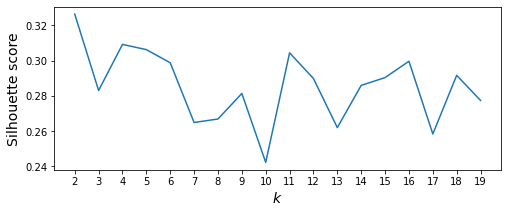

In [33]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 20), silhouette_scores)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.xticks(np.arange(2, 20, step=1))
plt.show()

In [34]:
k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(data_new2)

In [35]:
M1 = np.array([
[-0.5, -0.5060241, -0.5,0.0060241, -0.0060241,-0.0060241,0.5,0.0060241,  0.0060241, -0.0060241,
0., -0.0060241,0.],
[-0.5, -0.5, -0.5060241,0.,0.05421687,-0.01204819,0.5,-0.0060241,-0.0060241,-0.0060241,0.,0.,-0.0060241]
])



M2 = np.array([[-0.21038251, -0.33060109,  0.06830601, -0.25956284, -0.50546448,
        0.00273224,  0.13934426,  0.00273224,  0.41256831,  0.59289617,
       -0.00819672,  0.1010929 , -0.00273224],
               [-0.33060109, -0.34153005, -0.11202186, -0.34699454, -0.40710383,
       -0.23770492,  0.25409836, -0.09016393,  0.33060109,  0.43989071,
        0.03005464,  0.19398907,  0.12295082]
    
])

M3= np.array([
    [-0.0248 , -0.0248 , -0.0106 , -0.436  , -0.0745 , -0.677  ,
        0.00355,  0.0319 ,  0.457  ,  0.0603 ,  0.0532 ,  0.188  ,
        0.238  ],
    [-0.0957, -0.0816, -0.0461, -0.564 , -0.202 , -0.401 ,  0.0319,
        0.0674,  0.45  ,  0.195 ,  0.0745,  0.323 ,  0.372 ]
    
])

M4 = np.array(

[
[ 0.48   ,  0.5    ,  0.493  ,  0.147  ,  0.153  ,  0.0667 ,
       -0.353  , -0.24   , -0.12   , -0.127  , -0.147  , -0.0667 ,
        0.00667],
    [ 0.433,  0.413,  0.347,  0.273,  0.227,  0.193, -0.413, -0.18 ,
       -0.267, -0.167, -0.227, -0.16 , -0.08 ]
]
)



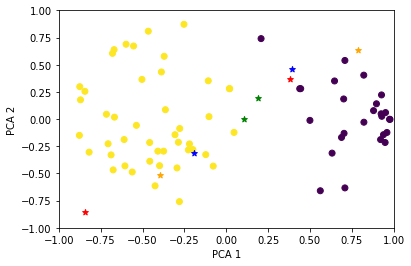

In [36]:
# PCA All data

X_centered = df2_norm - df2_norm.mean(axis = 0)
U, s , Vt = np.linalg.svd(X_centered)

W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
PCA1 = X2D[0]
PCA2 = X2D[1]

plt.scatter(PCA1,PCA2, c=y_pred, label=y_pred)

# Milo family 1 (2 points, complete)

M1_centered = M1 -np.array(df2_norm.mean(axis = 0))
M1_2D = M1_centered.dot(W2)
milo_1_PCA1 = M1_2D[0]
milo_1_PCA2 = M1_2D[1]
plt.scatter(milo_1_PCA1,milo_1_PCA2, c='red',marker = '*')

# Milo family 2 (2 point)

M2_centered = M2 -np.array(df2_norm.mean(axis = 0))
M2_2D = M2_centered.dot(W2)
milo_2_PCA1 = M2_2D[0]
milo_2_PCA2 = M2_2D[1]
plt.scatter(milo_2_PCA1,milo_2_PCA2, c='blue',marker = '*')

# Milo family 3 (2 point)

M3_centered = M3 -np.array(df2_norm.mean(axis = 0))
M3_2D = M3_centered.dot(W2)
milo_3_PCA1 = M3_2D[0]
milo_3_PCA2 = M3_2D[1]
plt.scatter(milo_3_PCA1,milo_3_PCA2, c='green',marker = '*')

# Milo family 4 (2 point)

M4_centered = M4 -np.array(df2_norm.mean(axis = 0))
M4_2D = M4_centered.dot(W2)
milo_4_PCA1 = M4_2D[0]
milo_4_PCA2 = M4_2D[1]
plt.scatter(milo_4_PCA1,milo_4_PCA2, c='orange',marker = '*')


plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('PCA 1');
plt.ylabel('PCA 2');

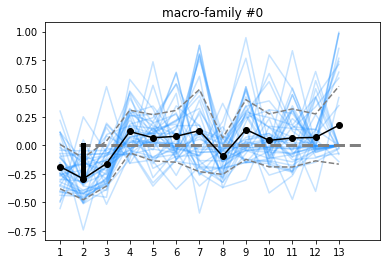

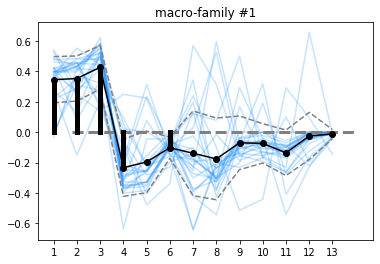

In [404]:
t = np.arange(0,13)
for y in np.unique(y_pred):
    selected_data = []
    for i in range(len(df2_norm)):
        if y_pred[i] == y:
            sp = np.array(df2_norm.iloc[i])
            selected_data.append(sp)
            plt.plot(t,sp,alpha=.25, c = 'dodgerblue')
    m = np.mean(np.array(selected_data),axis=0)
    s = np.std(np.array(selected_data),axis=0)
        
    plt.plot([0.8,13.1],[0,0],'--',c='gray',linewidth=3)
    
    plt.plot(t,m,'k')
    plt.plot(t,m,'ok')
    plt.plot(t,m+s,'--',c='gray')
    plt.plot(t,m-s,'--',c='gray')

    for k in range(13):
        if 0 <= m[k] - s[k] or 0>= m[k] + s[k]:
            plt.plot([k,k],[0,m[k]], c = 'k' ,linewidth=5)
    
    plt.xticks(np.arange(13), [str(i) for i in range(1,14)])
    
    plt.title('macro-family #'+str(y))
    plt.show()